<a href="https://colab.research.google.com/github/Flowergift/Python_AI_Sample/blob/main/517_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

image_color.shape= (500, 500, 3)
image.shape= (500, 500)
image_pad.shape= (502, 502)


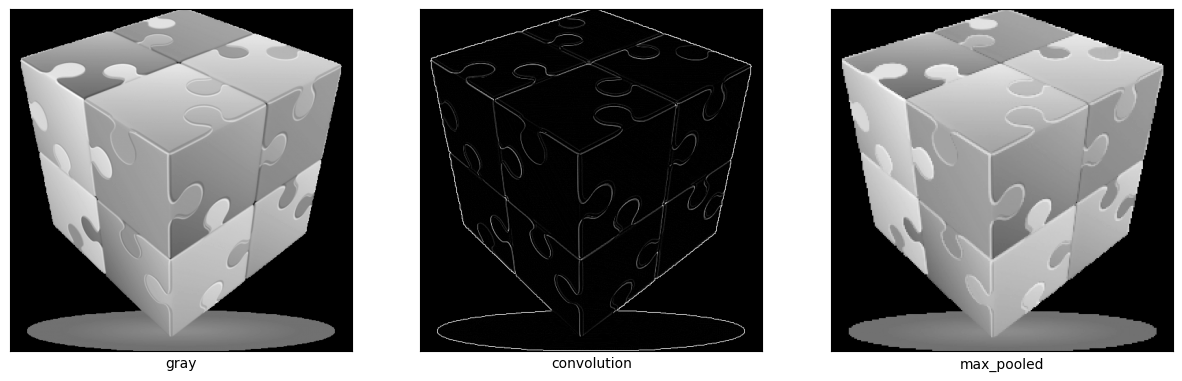

In [24]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image_color = cv2.imread('./sample_data/cube.png')

print('image_color.shape=', image_color.shape)
image = cv2.cvtColor(image_color, cv2.COLOR_BGR2GRAY)
print('image.shape=', image.shape)

filter = np.array([
    [-1,-1,-1],
    [-1,8,-1],
    [-1,-1,-1],
])

image_pad = np.pad(image,((1,1),(1,1)))

print('image_pad.shape=', image_pad.shape)

convolution = np.zeros_like(image)

for row in range(image.shape[0]):
  for col in range(image.shape[1]):
    window = image_pad[row:row+3, col:col+3]
    convolution[row, col] = np.clip(np.sum(window*filter), 0, 255)

max_pooled = np.zeros((int(image.shape[0]/2), int(image.shape[1]/2)))

for row in range(0, int(image.shape[0]/2)):
  for col in range(0,int(image.shape[1]/2)):
    window = image_pad[2*row:2*row+2, 2*col:2*col+2]
    max_pooled[row, col] = np.max(window)

images = [image, convolution, max_pooled]
labels = ['gray','convolution', 'max_pooled']

plt.figure(figsize=(15,5))

for i in range(len(images)):
  plt.subplot(1,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(images[i], cmap=plt.cm.gray)
  plt.xlabel(labels[i])
plt.show()
